# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want to predict jobs salaries based on jobs informations. Our goal is to improve the salary predictor KPI

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np
%matplotlib inline
#your info here
__author__ = "Alex EBE"
__email__ = "alexauguste01@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe
test_features = pd.read_csv('data/test_features.csv')
train_features = pd.read_csv('data/train_features.csv')
train_salaries = pd.read_csv('data/train_salaries.csv')

In [3]:
train_features.head(20)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
train_features.shape

(1000000, 8)

In [5]:
train_salaries.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


The dataset has only 2 numerical variables: `yearsExperience` and `milesFromMetropolis`

### ---- 3 Clean the data ----

In [7]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it
duplicate = train_features.duplicated(subset=['jobId'])
duplicated = duplicate[duplicate == True]
duplicated

Series([], dtype: bool)

There is no duplicate rows

In [8]:
#Invalid data
invalid_salaries = train_salaries.loc[train_salaries['salary']<=0,:]
invalid_job_offers = train_features.loc[invalid_salaries.index,:]
invalid_salaries #invalid data in outcome dataset

,jobId,salary
30559,JOB1362684438246,0
495984,JOB1362684903671,0
652076,JOB1362685059763,0
816129,JOB1362685223816,0
828156,JOB1362685235843,0


In [9]:
invalid_job_offers #invalid data in feature dataset

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29


Jod Ids `JOB1362684438246`, `JOB1362684903671`, `JOB1362685059763`, `JOB1362685223816`, `JOB1362685235843` are invalid.
Let's remove them

In [10]:
#Remove invalid data
train_salaries.drop(invalid_salaries.index, inplace=True)
train_features.drop(invalid_salaries.index, inplace=True)

In [11]:
train_salaries.shape

(999995, 2)

In [12]:
#Reset indexing
train_salaries.reset_index(inplace=True)
train_features.reset_index(inplace=True)

### ---- 4 Explore the data (EDA) ----

In [13]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

Summarize the **major** variable

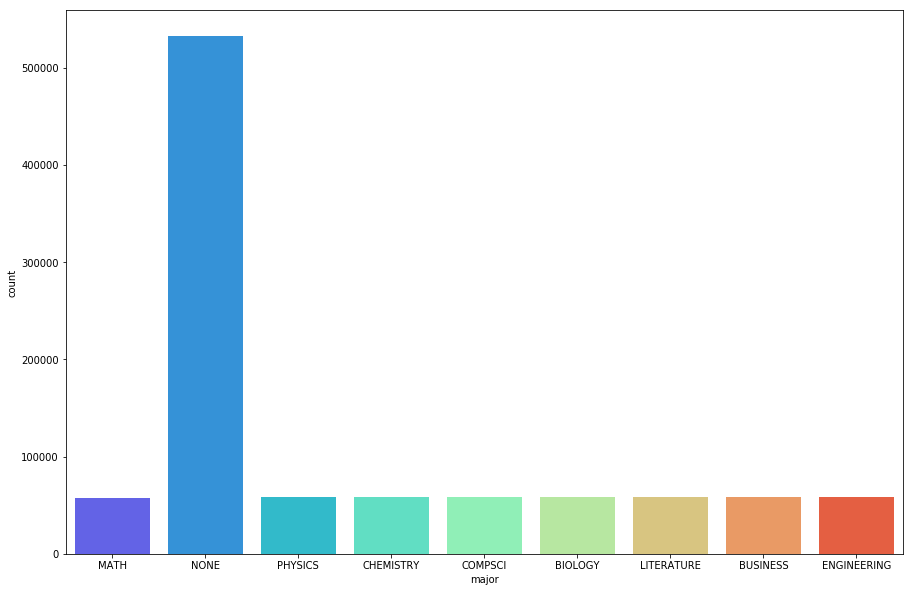

In [14]:
plt.figure(figsize=(15,10))
sns.countplot(x='major', data=train_features, palette='rainbow')

Summarize the **jobType** variable

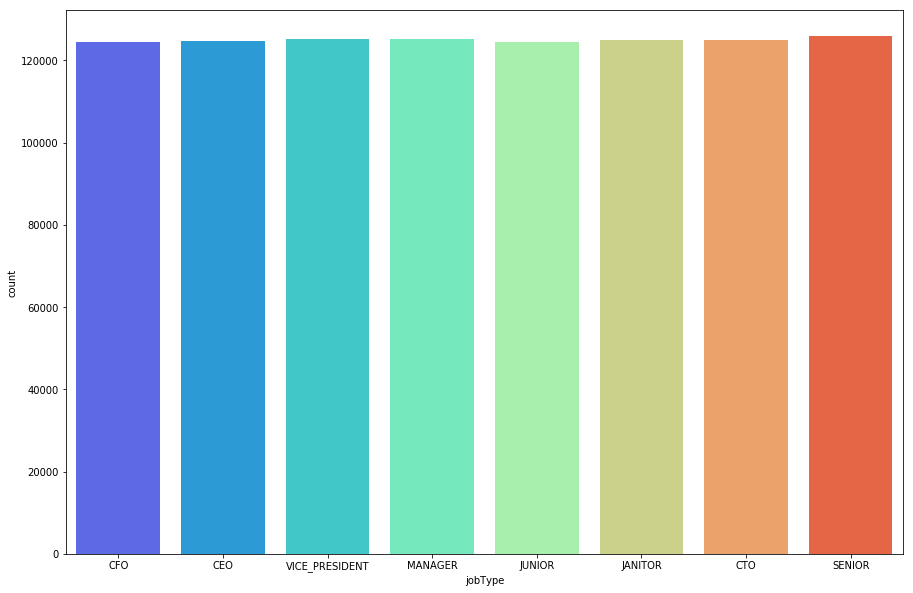

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x='jobType', data=train_features, palette='rainbow')

Summarize the **degree** variable

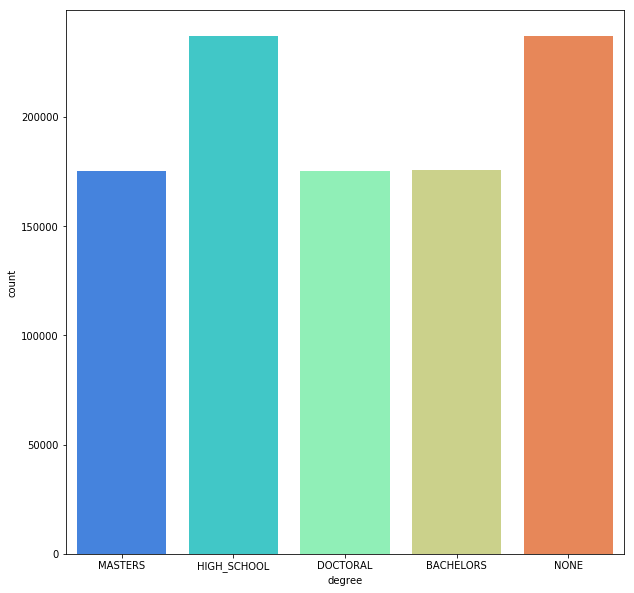

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x='degree', data=train_features, palette='rainbow')

Summarize the **industry** variable

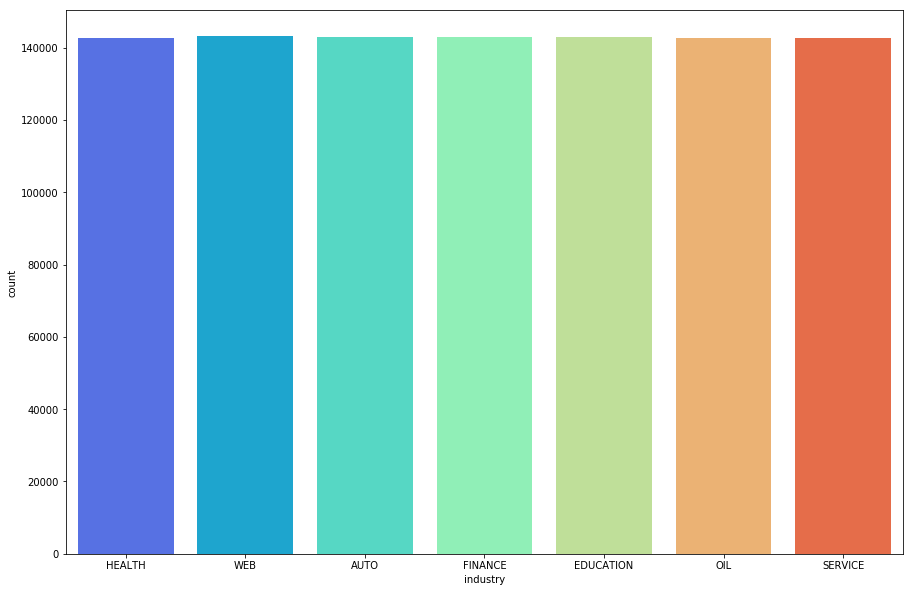

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x='industry', data=train_features, palette='rainbow')

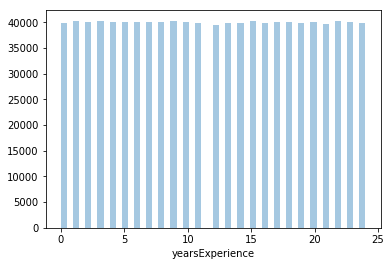

In [18]:
sns.distplot(train_features['yearsExperience'],kde=False, bins=50)

Summarize **salary** variable

In [19]:
job_offers = pd.concat([train_features, train_salaries['salary']], axis=1)

In [20]:
job_offers.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


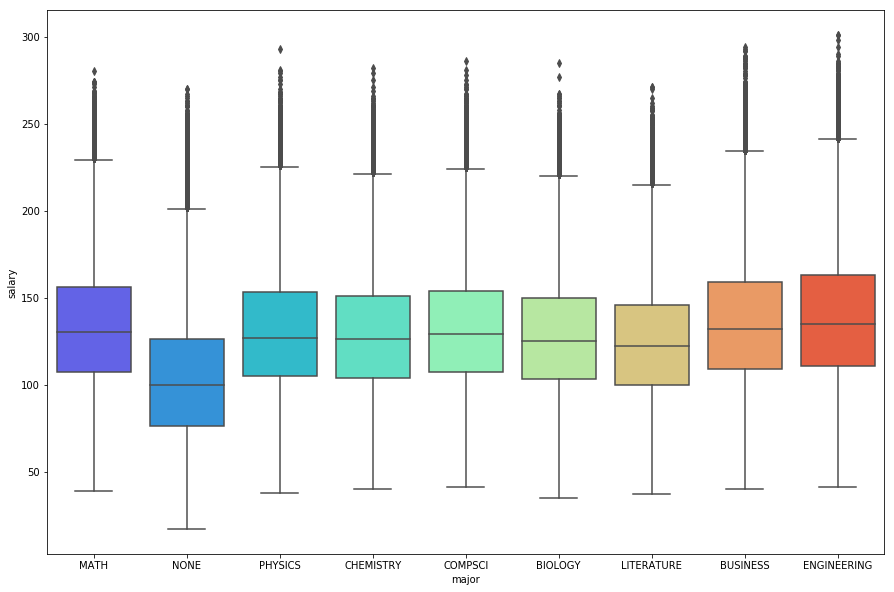

In [21]:
plt.figure(figsize=(15,10))
sns.boxplot(x="major", y="salary", data=job_offers,palette='rainbow')

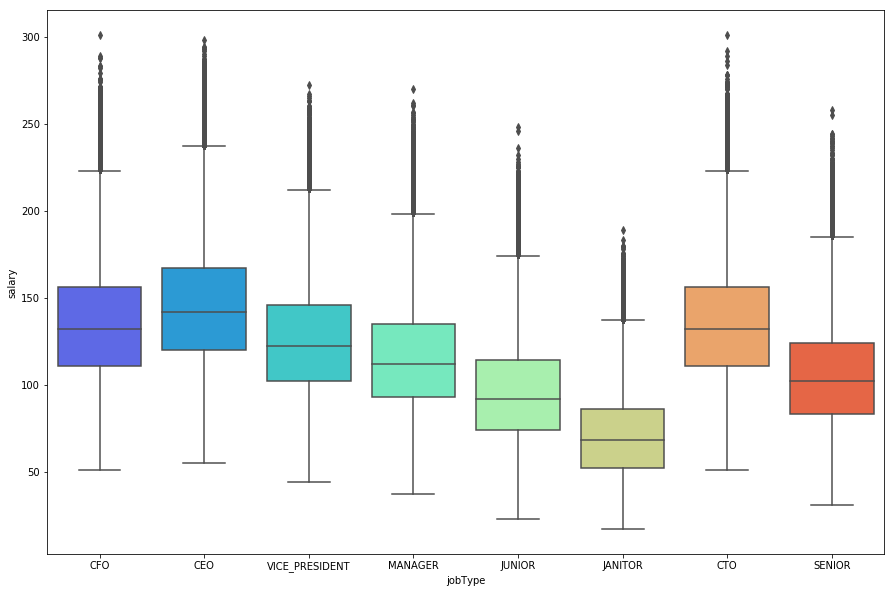

In [22]:
plt.figure(figsize=(15,10))
sns.boxplot(x="jobType", y="salary", data=job_offers,palette='rainbow')

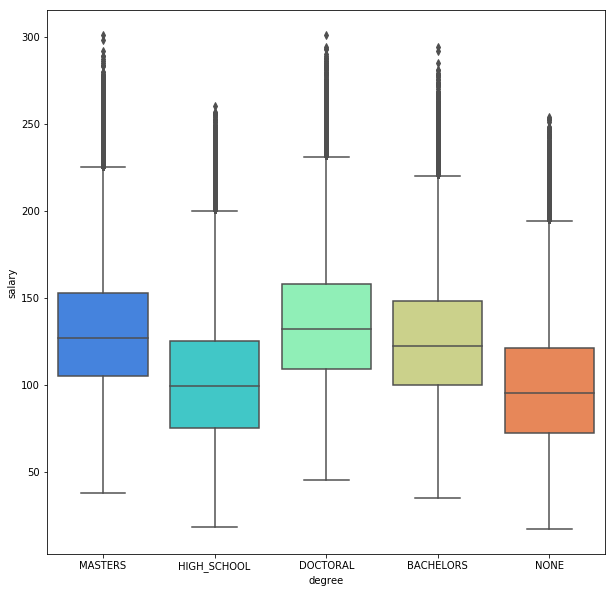

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x="degree", y="salary", data=job_offers,palette='rainbow')

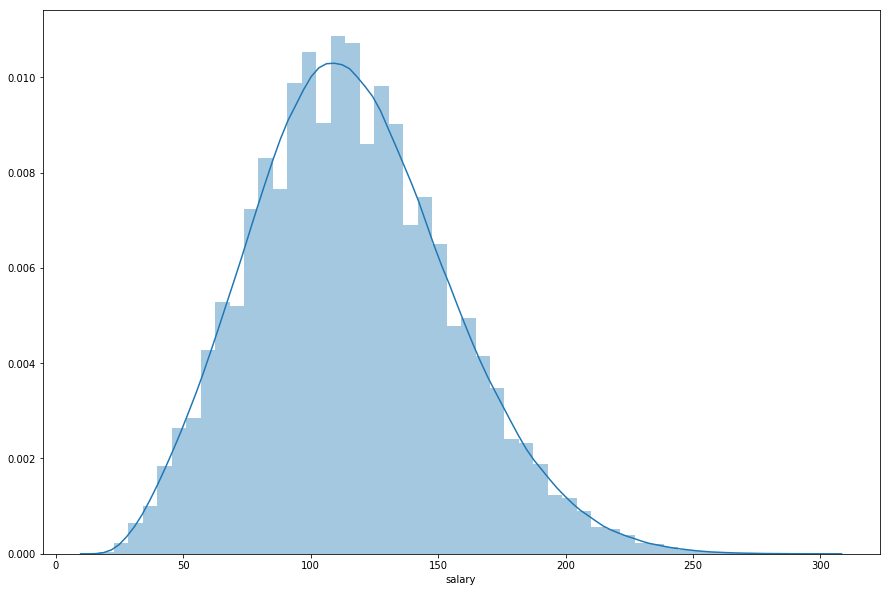

In [24]:
plt.figure(figsize=(15,10))
sns.distplot(job_offers['salary'], bins=50)

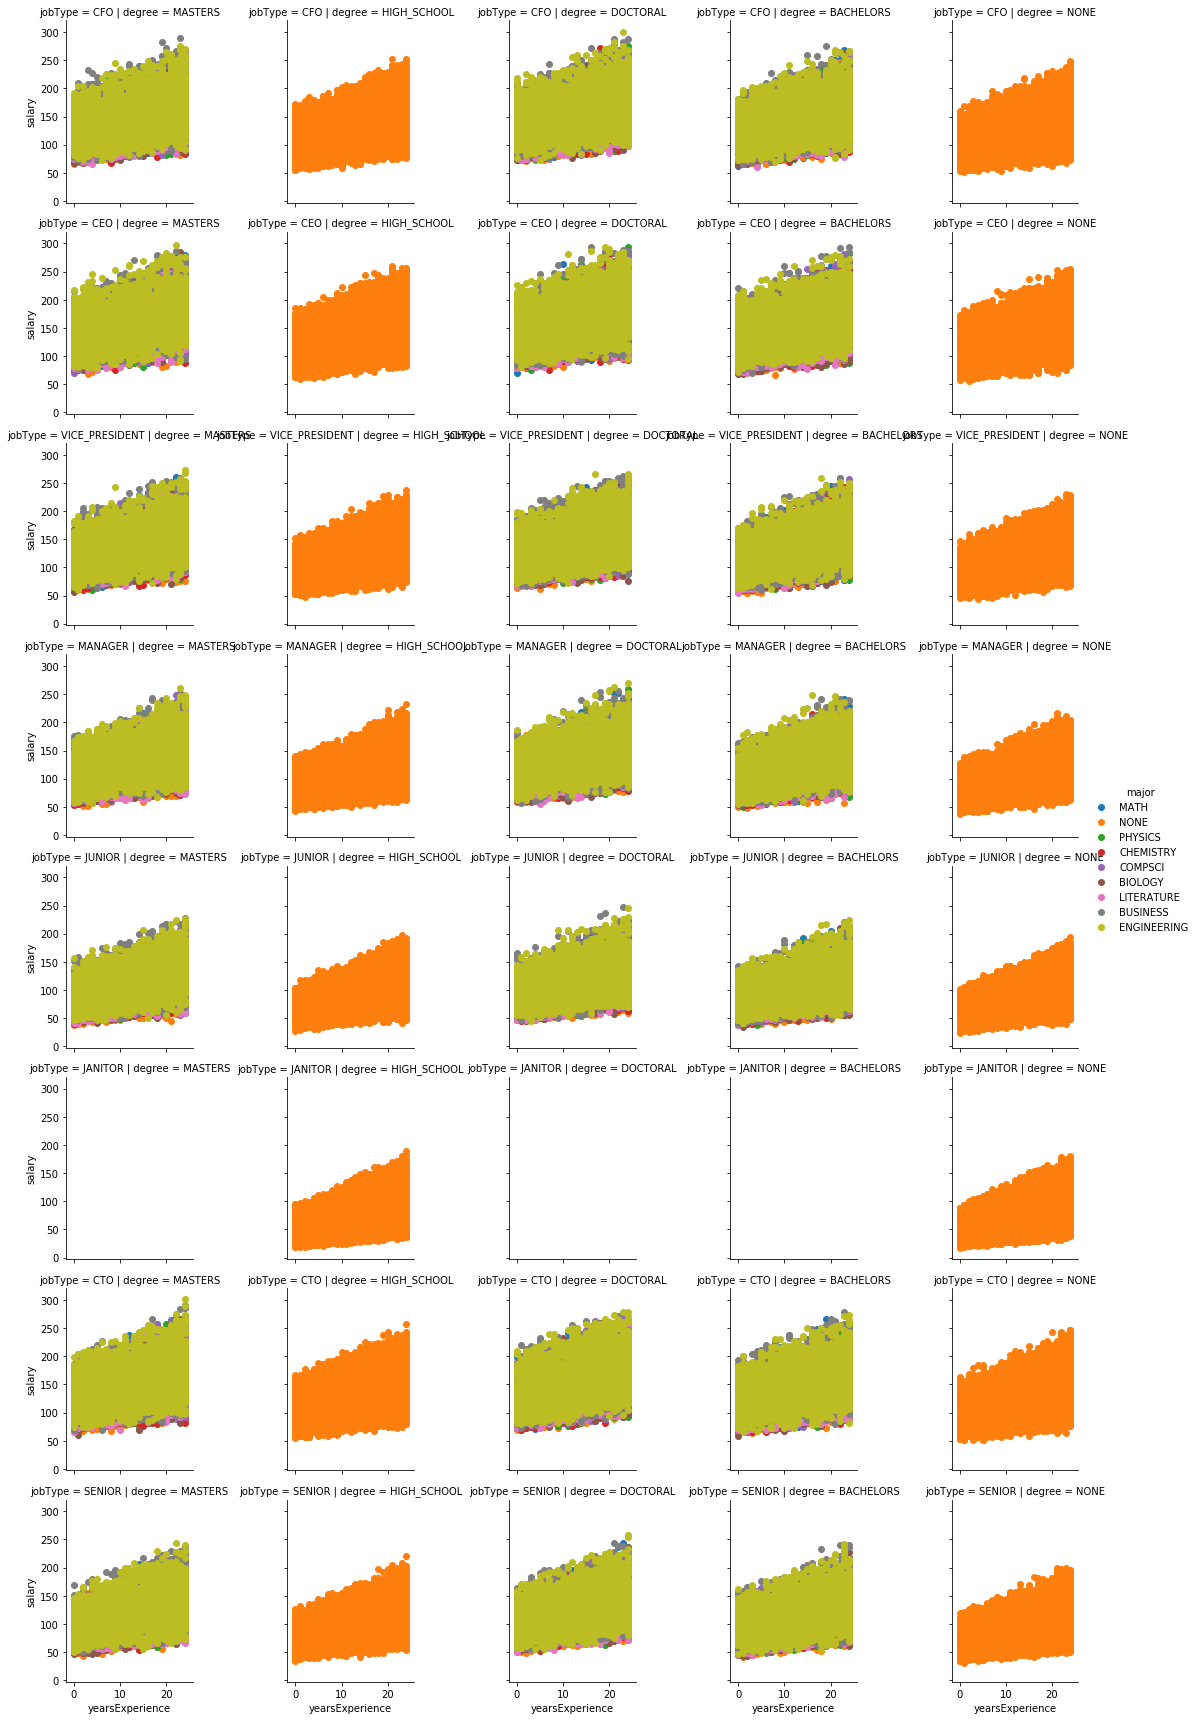

In [25]:
g = sns.FacetGrid(job_offers, col="degree", row='jobType', hue='major')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "yearsExperience", "salary").add_legend()

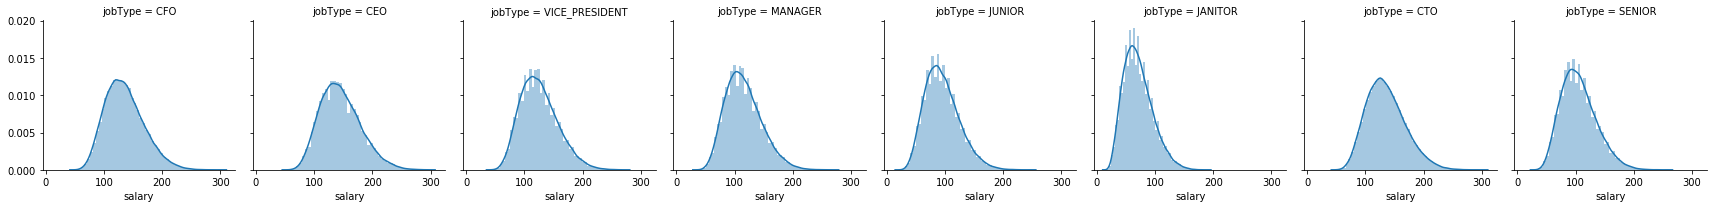

In [26]:
g = sns.FacetGrid(job_offers, col="jobType")
# Notice hwo the arguments come after plt.scatter call
g = g.map(sns.distplot, "salary").add_legend()

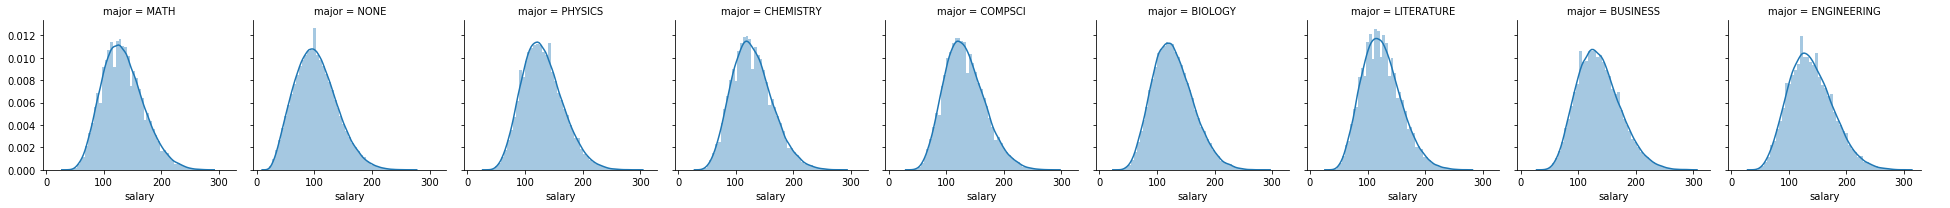

In [27]:
g = sns.FacetGrid(job_offers, col="major")
# Notice hwo the arguments come after plt.scatter call
g = g.map(sns.distplot, "salary").add_legend()

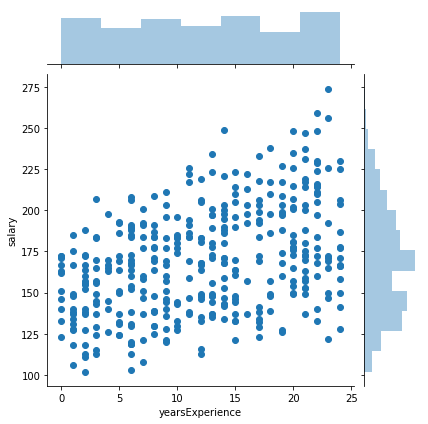

In [97]:
sd1 = job_offers.loc[(job_offers['jobType']=='CEO') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='ENGINEERING') & (job_offers['industry']=='FINANCE'),:]
sns.jointplot(x='yearsExperience',y='salary',data=sd1,kind='scatter')

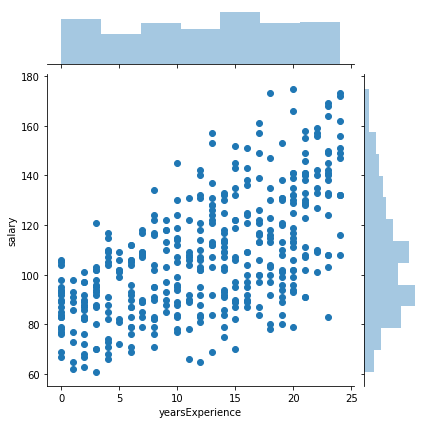

In [108]:
sd2 = job_offers.loc[(job_offers['jobType']=='SENIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sns.jointplot(x='yearsExperience',y='salary',data=sd2,kind='scatter')
#sns.lmplot(x='yearsExperience',y='salary',data=sd2,hue='sex',palette='coolwarm')

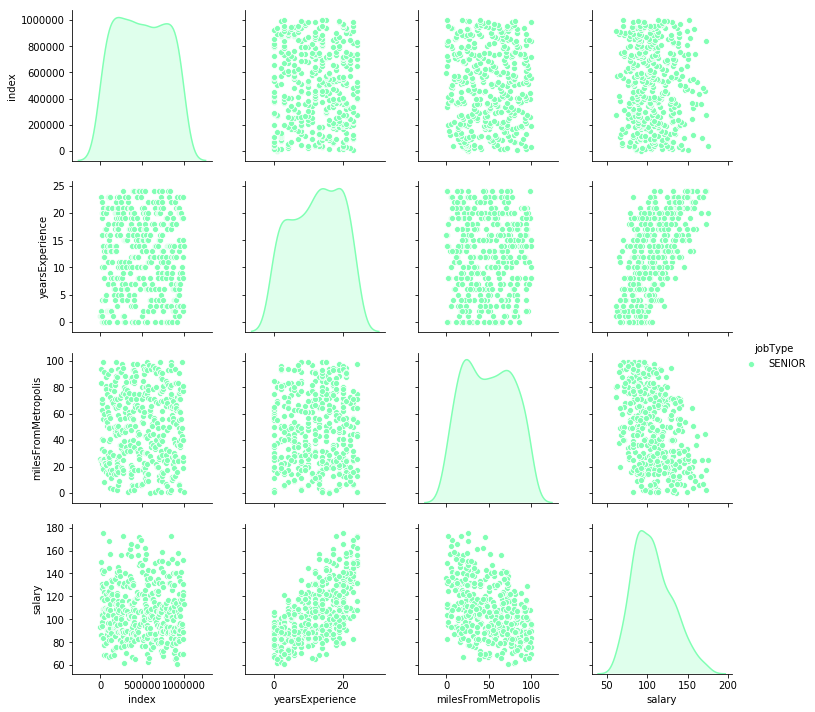

In [101]:
sd3 = job_offers.loc[(job_offers['jobType']=='SENIOR') & (job_offers['degree']=='MASTERS') & (job_offers['major']=='PHYSICS') & (job_offers['industry']=='AUTO'),:]
sns.pairplot(sd3, hue='jobType',palette='rainbow')

### ---- 5 Establish a baseline ----

In [28]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

We use MSE to evaluate the baseline

Let's create a simple model which for a given job offer, use the average salary of the feature **jobType** as prediction. We make this choice because **jobType** feature shows more variability for the target feature.

In [29]:
grouped_by_jobType = job_offers.groupby('jobType').agg({'salary':'mean'})

In [30]:
grouped_by_jobType

,salary
jobType,
CEO,145.311425
CFO,135.458547
CTO,135.481067
JANITOR,70.813045
JUNIOR,95.333087
MANAGER,115.368518
SENIOR,105.487775
VICE_PRESIDENT,125.368630


Baseline prediction on train dataset

In [74]:
baseline_prediction_train = [grouped_by_jobType.loc[train_features.iloc[i]['jobType'],'salary'] for i in train_features.index]

Data preprocessing on jobType categorical variable

In [51]:
baseline_features = pd.get_dummies(train_features['jobType'], drop_first=True)

In [52]:
baseline_salaries = pd.DataFrame()

In [75]:
baseline_salaries['prediction'] = pd.Series(baseline_prediction_train)

In [54]:
baseline_salaries.shape

(999995, 1)

Baseline model

In [55]:
baseline_model = sk.linear_model.LinearRegression()

Cross-validation

In [60]:
kFold = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=1)

In [82]:
#models list stored following this pattern: (model, score)
models = []
for k, (train_index, test_index) in enumerate(kFold.split(baseline_features, baseline_salaries)):
    baseline_model = sk.linear_model.LinearRegression()    
    baseline_model.fit(baseline_features.iloc[train_index], baseline_salaries.iloc[train_index])
    y_pred = baseline_model.predict(baseline_features.iloc[test_index])
    score = sk.metrics.mean_squared_error(train_salaries.iloc[test_index]['salary'], y_pred)
    models.append((baseline_model, score))
    print('Fold: %s, Acc: %.3f, Coef: %s' %(k+1, models[k][1], models[k][0].coef_))

Fold: 1, Acc: 961.703, Coef: [[ -9.85287835  -9.83035828 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]
Fold: 2, Acc: 965.712, Coef: [[ -9.85287835  -9.83035828 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]
Fold: 3, Acc: 962.680, Coef: [[ -9.85287835  -9.83035828 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]
Fold: 4, Acc: 962.325, Coef: [[ -9.85287835  -9.83035827 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]
Fold: 5, Acc: 967.207, Coef: [[ -9.85287835  -9.83035828 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]


Mean score

In [72]:
print('CV score: %.3f' %(np.mean([score[1] for score in models])))

CV score: 963.925


Pick the best model

In [73]:
index_min = np.argmin([score[1] for score in models])
best_model = scores[index_min][0]
print('Best parameters: %s' %(best_model.coef_))

Best parameters: [[ -9.85287835  -9.83035828 -74.49838046 -49.97833789 -29.94290687
  -39.82365044 -19.94279517]]


Preprocessing test data

In [76]:
baseline_features_test = pd.get_dummies(train_features['jobType'], drop_first=True)

Run the baseline model on test dataset

In [77]:
baseline_prediction_test = baseline_model.predict(baseline_features_test)

### ---- 6 Hypothesize solution ----

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

* Linear Regression
* Random Forest
* KNN

New features

`major_mean`: mean salary for each level of `major` feature  
`degree_mean`: mean salary for each level of `degree` feature  
`jobType_mean`: mean salary for each level of `jobType` feature  
`industry_mean`: mean salary for each level of `industry` feature

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data